# Fraud Detection
---

Procedemos a importar las librerias necesarias para desarrollar el modelo.

In [13]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos el dataset e imprimimos las primeras columnas de datos.

In [90]:
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv'
fraud = pd.read_csv(url)
fraud_d = pd.get_dummies(fraud, prefix = '', prefix_sep = '')
print(fraud_d.head())

   accountAgeDays  numItems  localTime  paymentMethodAgeDays  label  \
0              29         1   4.745402             28.204861      0   
1             725         1   4.742303              0.000000      0   
2             845         1   4.921318              0.000000      0   
3             503         1   4.886641              0.000000      0   
4            2000         1   5.040929              0.000000      0   

   creditcard  paypal  storecredit  
0           0       1            0  
1           0       0            1  
2           1       0            0  
3           1       0            0  
4           1       0            0  


Verificamos si existen datos nulos para iniciar la limpieza de datos, en este caso no existen datos nulos.

In [3]:
print(fraud_d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethodAgeDays  39221 non-null  float64
 4   label                 39221 non-null  int64  
 5   creditcard            39221 non-null  uint8  
 6   paypal                39221 non-null  uint8  
 7   storecredit           39221 non-null  uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 1.6 MB
None


Aquí podemos ver unas gráficas de la edad de la cuenta y el numero de items pudiendo ver si realmente es un fraude(label=1).

In [115]:
fig = px.scatter(fraud, x= 'accountAgeDays', y = 'numItems', color = 'label', width = 800, height = 400)
fig.show()

Por la gráfica se observa que la totalidad de los puntos cuando es fraude, se encuentran cuando la edad de la cuenta es de 1 día.   Para confirmar los datos esto, filtraremos los resultados para una comprobación.

In [103]:
print(fraud_d[(fraud_d['label'] == 1) & (fraud_d['accountAgeDays'] > 1)].count().sum())

0


Utilizaremos la función plotly histogram para poder conocer la distribución de nuestro set de datos.

In [6]:
for var in fraud.columns:
    fig = px.histogram(fraud, x=var, width = 700, height = 350)
    fig.show()

Buscamos la correlación entre las variables y las graficamos en un mapa de calor.

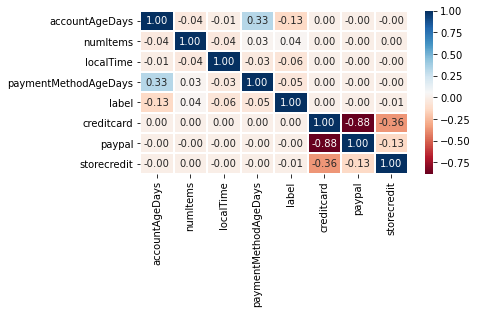

In [23]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.heatmap(fraud_d.corr(), annot = True, fmt = '.2f', cmap = 'RdBu', linewidth = 1)

Ahora procedemos a separar las variables de entrenamiento y la prueba, utilizaremos 25% de nuestros datos para verificar el modelo.

In [105]:
X = fraud_d.drop('label', axis = 1).values
y = fraud_d['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [108]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_predict = lgr.predict(X_test)

Se imprime la reporte de clasificacion para juzgar el desempeño del modelo.

In [107]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9671
           1       1.00      1.00      1.00       135

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806



Comprobación visual del resultado del modelo.

In [114]:
prediction = lgr.predict(X)
fraud_d['label_predicted'] = prediction
fraud_d['model_verification'] = prediction == y
fig = px.scatter(fraud_d, x= 'accountAgeDays', y = 'numItems', color = 'model_verification', width = 700, height = 350)
fig.show()